# Introduction

This project introduces complete machine learning workflow by presenting the process of building a model which can predict letters or digits in a given image. Specifically, with a given dataset included thousands of images, each of which is attached with a label indicating digit or letter in the image, we will build a model that can predict character when we give it new image. Which type of model is called classifier, it classifies an image to one of finite given classes, in our case, 47 classes. Before diving into building model, there are some more detail and concepts that need to be introduced.


**Training model**

The machine programs couldn't know what digits or letters look like without "teaching" (or training) them. But far from as complex as the human brain, machines learn by generalizing data that is fetched to them and predict the most likely result based on a generalized model. For instance, in predicting life satisfaction, a model may generalize that individuals with higher incomes tend to be more satisfied with their lives. Nevertheless, this generalization cannot be universally applied to all cases as there are people who lead happy lives despite having modest incomes, and there are many instances to the contrary.

The data we fetch to a model for training them is called a "training set", this is a set of sample-label pairs, in our case, a set of pairs of images and corresponding characters.

When a model has been trained, we need to test them by give it a set of new images, which the model hasn't learn yet, and see how the model predict result. This set of data is called "test set".


**EMNIST Dataset: collection of hand-writen images**

The EMNIST dataset is a collection of hand-written images that has been widely used for machine learning projects involving character recognition. The dataset contains hundreds of thousand of images, with each image labeled as one of 62 (or 47) classes representing 62 (47) characters. The classes include both uppercase and lowercase letters, as well as digits. The dataset has been carefully preprocessed to ensure that each image is normalized and of consistent size, making it an ideal choice for training and testing machine learning models. In this project, we will explore the process of building a machine learning model to accurately classify the images in the EMNIST balanced version dataset.

**Model type: supervised learning**

The type of machine learning model used for this project is supervised learning. In supervised learning, the model is trained on a labeled dataset, meaning that each data point in the dataset is associated with a corresponding label or target variable. The goal is to use this labeled data to build a model that can accurately predict the target variable for new, unseen data points. In the case of the EMNIST dataset, each image is labeled with a corresponding character, which will serve as the target variable for our model. We will use the labeled training data to train our model to predict the correct character for new images. Supervised learning is a popular approach for a wide range of machine learning tasks, from image classification to natural language processing.


**Introduction to scikit-learn**

Scikit-learn is a popular machine learning library in Python that provides easy-to-use tools and functions for building and evaluating machine learning models. It offers a range of features that can help simplify the process of creating accurate models. Some of these features include:

1. Data preprocessing: Scikit-learn provides tools for cleaning, transforming, and scaling data so that it can be used effectively with machine learning models.
2. Model selection: The library offers a range of models that can be used for different types of problems, and provides functions for training and testing these models.
3. Model evaluation: Scikit-learn offers several techniques for evaluating model performance, such as cross-validation and various scoring metrics.
4. Hyperparameter tuning: Scikit-learn provides tools for adjusting model parameters to improve performance, such as grid search and randomized search.





**Main steps in Machine learning project**

Common steps of a machine learning project:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data to gain insights
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune the models and combine them into a great solution
7. Present your solution
8. Launch, monitor, and maintain your system


# Frame the problem and look at the big picture

**Classification problem in machine learning**

Classification is one of the most popular problems in machine learning. It involves predicting a categorical or discrete target variable to which a given sample belongs, in our case, an image. Building a classification model will involve fundamental concepts in ML, and give us common sense in how AI models are built.



**Look at the dataset**


EMNIST dataset has many versions, the largest size version has up to 731,668 images each of which is 28x28 pixels. This size of dataset is too large for our project as it requires huge computational resources. Additional, this large dataset isn't balanced which mean the number of images of character 'a' may be double the character 'b'.

The selected version of our project is balanced version. It contains 112800 training images and 18800 testing images. This dataset involves 47 classes, all of which have the same (or balanced) number of samples. One special note about balanced dataset is that it grouped some similar looking classes, thus, the number of classes is 47 instead of 62 classes representing characters a-z, A-Z and 0-9.

# Get the data

Dataset is downloaded from NIST (National Institute of Standards and Technology) website, which is a government agency of US that provides public access to EMNIST.

Dataset's authors: Gregory Cohen, Saeed Afshar, Jonathan Tapson, and Andre van Schaik -- The MARCS Institute for Brain, Behaviour and Development --
Western Sydney University -- Penrith, Australia 2751


Data were downloaded and put in the correct location, we will run a python script to load it into an object of class DataContainer. This object contains the training set and test set used in our project as well as provide some utilized function to display information about the dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra library
from src.data_container import DataContainer # data container class
import src.emnist_utils as utils # utility functions

np.random.seed(42) # set random seed for reproducibility

# load data
dc = DataContainer()
dc.load_emnist()

In [2]:
print(dc.get_information())

Train set: 112800 images, 784 features
Test set: 18800 images, 784 features
Number of classes: 47
Characters: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'd' 'e' 'f' 'g' 'h' 'n' 'q' 'r' 't']



In the output above, we note the word "features", which means features of data samples. In our case, the features of a 28x28 image are pixels of the image itself. There are 784 pixels, so are 784 features.

Next, we will plot image of all classes:


Number of classes:  47


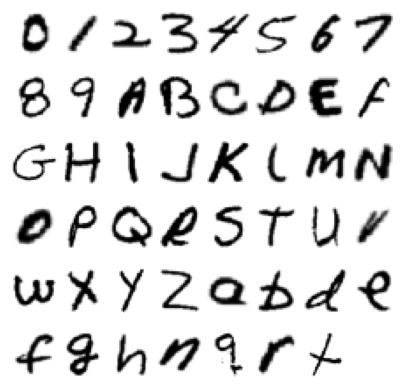

In [3]:
print("\nNumber of classes: ", len(dc.mapping.keys()))
utils.setup_figure(size=(5, 5))
dc.plot_all_chars(max_no_columns=8)

# Explore the data to gain insights

Distribution of images in each class:

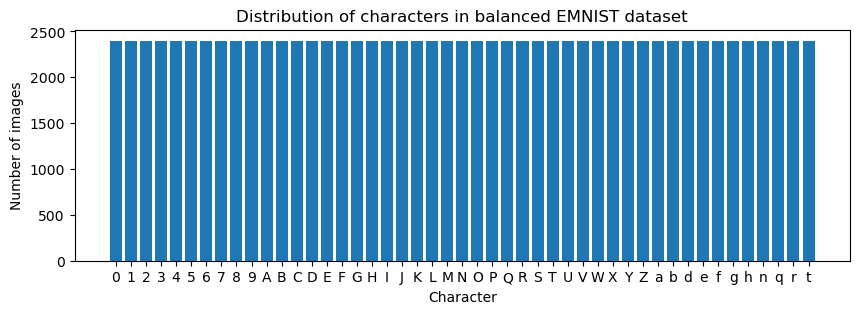

In [4]:
utils.setup_figure(size=(10, 3))
dc.plot_char_distribution()

The image set is stored as a matrix, each row is a 784-sized vector that represents an image. The image set is stored as a matrix, each row is a 784-sized vector that represents an image. Next script will print the size of train set and test set:

In [5]:
print("X_train shape: ", dc.X_train.shape)
print("y_train shape: ", dc.y_train.shape)
print("X_test shape: ", dc.X_test.shape)
print("y_test shape: ", dc.y_test.shape)

X_train shape:  (112800, 784)
y_train shape:  (112800,)
X_test shape:  (18800, 784)
y_test shape:  (18800,)


Each image in the EMNIST is 8-bit resolution:

In [6]:
print("Pixel min value: ", dc.X_train.min())
print("Pixel max value: ", dc.X_train.max())

Pixel min value:  0.0
Pixel max value:  255.0


Print images of some character:

Some images of character '5':


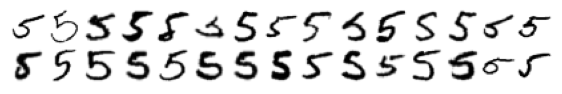

Some images of character 'a':


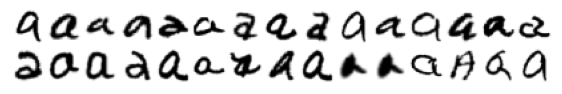

In [7]:
# import matplotlib lib for plotting
from matplotlib import pyplot as plt

# plot ch character '5'
print("Some images of character '5':")
utils.setup_figure(size=(7, 1))
dc.plot_character('5', 30, max_no_columns=15)

# plot ch character 'a'
print("Some images of character 'a':")
utils.setup_figure(size=(7, 1))
dc.plot_character('a', 30, max_no_columns=15)

# Data preprocessing

Before fetching data into the model, we need to preprocess the data. Data preprocessing is a very critical task in ML project.

**Cleaning data**

Data cleaning is the process of identifying and correcting or removing any errors or inconsistencies in the dataset. This is important because these errors can negatively impact the accuracy of the model. In the case of the EMNIST dataset, the data has already been preprocessed and cleaned, so there is no need for additional data cleaning.

**Applying image processing techniques**

In order to make images in the dataset easier for machine learning model to learn or extract useful information from images, we can use image processing techniques. Some techniques that can be applied to the EMNIST dataset are edge detection, image shiftable edges,... But these techniques are out of the scope of this project, so we skip this part.

**Expanding the training data**

To improve the performance of our machine learning model, it's important to have a large and diverse dataset for training. One way to expand the training data is through data augmentation, which involves applying transformations to the original images to create new training samples.

In this project, we use image shifting to create new samples. We will apply shifting to some images and see result.


Original images:


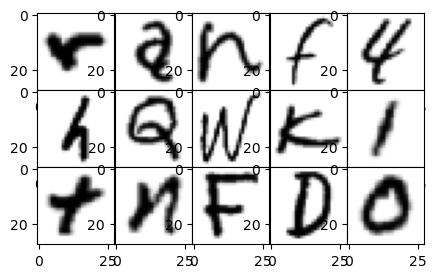

Top-right shifted images:


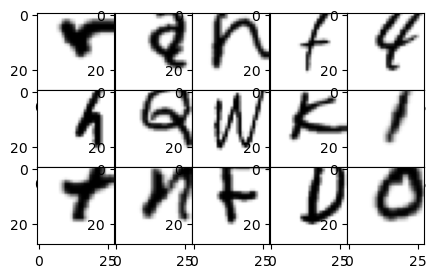

In [8]:
# get first 15 images in the training set
original_images = dc.X_train[0:15]

# shift images 5 pixel to right and 5 pixel to bottom
top_right_shifted_images = utils.shift_images(original_images, dx=5, dy=-5)

# plot original images
print("Original images:")
utils.setup_figure(size=(5, 3))
utils.plot_characters(original_images, max_no_columns=5, plot_axis=True)
plt.show()

# plot second shifted images
print("Top-right shifted images:")
utils.setup_figure(size=(5, 3))
utils.plot_characters(top_right_shifted_images, max_no_columns=5, plot_axis=True)

**Normalizing the data**

Data normalization is an important step in data preprocessing. It involves scaling the data to a common range to ensure that no particular feature dominates the model training process. One commonly used method for normalization is the MinMaxScaler, which scales the data to a range between 0 and 1. Another popular method is the StandardScaler, which scales the data to have zero mean and unit variance. For our project, we will be using the MinMaxScaler to normalize our data.

Here is average value of each pixel in the training set:

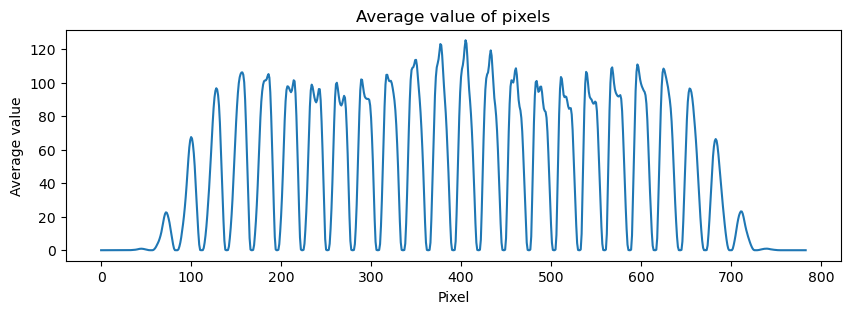

In [9]:
utils.setup_figure(size=(10, 3))
dc.plot_pixel_average_values()

First, we will try to use Standard Scaler to normalize the data:

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_images = scaler.fit_transform(dc.X_train)

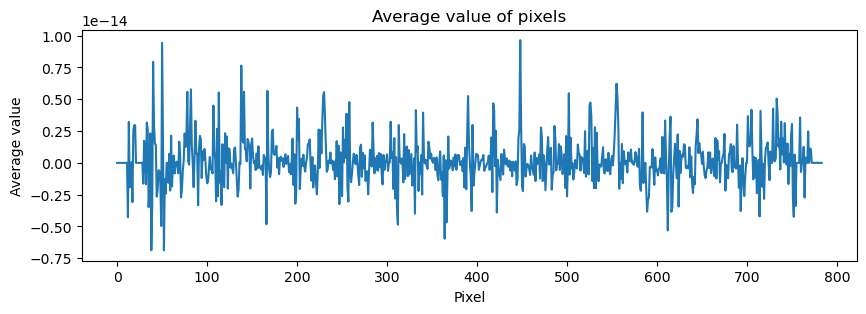

In [11]:
utils.setup_figure(size=(10, 3))
utils.plot_pixel_average_values(scaled_images)

We see that StandardScaler scale all pixel values to nearly zero in average. This is not good for our model, so we will use MinMaxScaler instead:

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_images = scaler.fit_transform(dc.X_train)

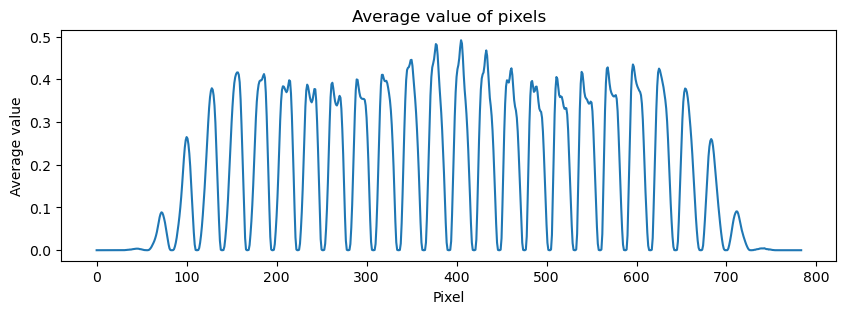

In [13]:
utils.setup_figure(size=(10, 3))
utils.plot_pixel_average_values(scaled_images)

Min Max scaler simply divide all pixel by 255, so it remain the same shape as original data. Simple but enough, we will use this scaling method in next steps.

# Explore some models

We will train some models and then evaluate them to choose the ones that are best suited to our needs.

## K-Nearest Neighbors Classifier

K-Nearest Neighbors Classifier is a simple algorithm that predicts the class of a data point based on the classes of its nearest neighbors in the training set. It is a type of lazy learning, meaning it does not require a training phase, and is easy to implement. However, it may not work well on high-dimensional data or imbalanced datasets.

**Initiating and training KNN model**

In [14]:
# import KNN classifier and min max scaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# split training data into 2 set, one for training, other for validation
X_train, X_val, y_train, y_val = train_test_split(dc.X_train, dc.y_train, test_size=0.2)

# preprocess data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# initiate KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=20, n_jobs=5)

# train KNN
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=5, n_neighbors=20)

It is simple to train a model. Next, we will evaluate the model by giving it new images that it hasn't been learned and see how accurate it is.

In [15]:
# predict images on validation set
y_predicts = knn_clf.predict(X_val)

In [16]:
# print result
print("Number of predictions:", len(y_predicts))
print("Number of correct predictions:", sum(y_predicts == y_val))
print("Accuracy rate: ", sum(y_predicts == y_val) / len(y_predicts))

Number of predictions: 22560
Number of correct predictions: 17242
Accuracy rate:  0.7642730496453901


Accuracy of 76.4% is a relatively bad result. We will elaborate the reason by using Confusion Matrix.

**Confusion Matrix: a common metric to evaluate classifier**

Confusion matrix of KNN model:


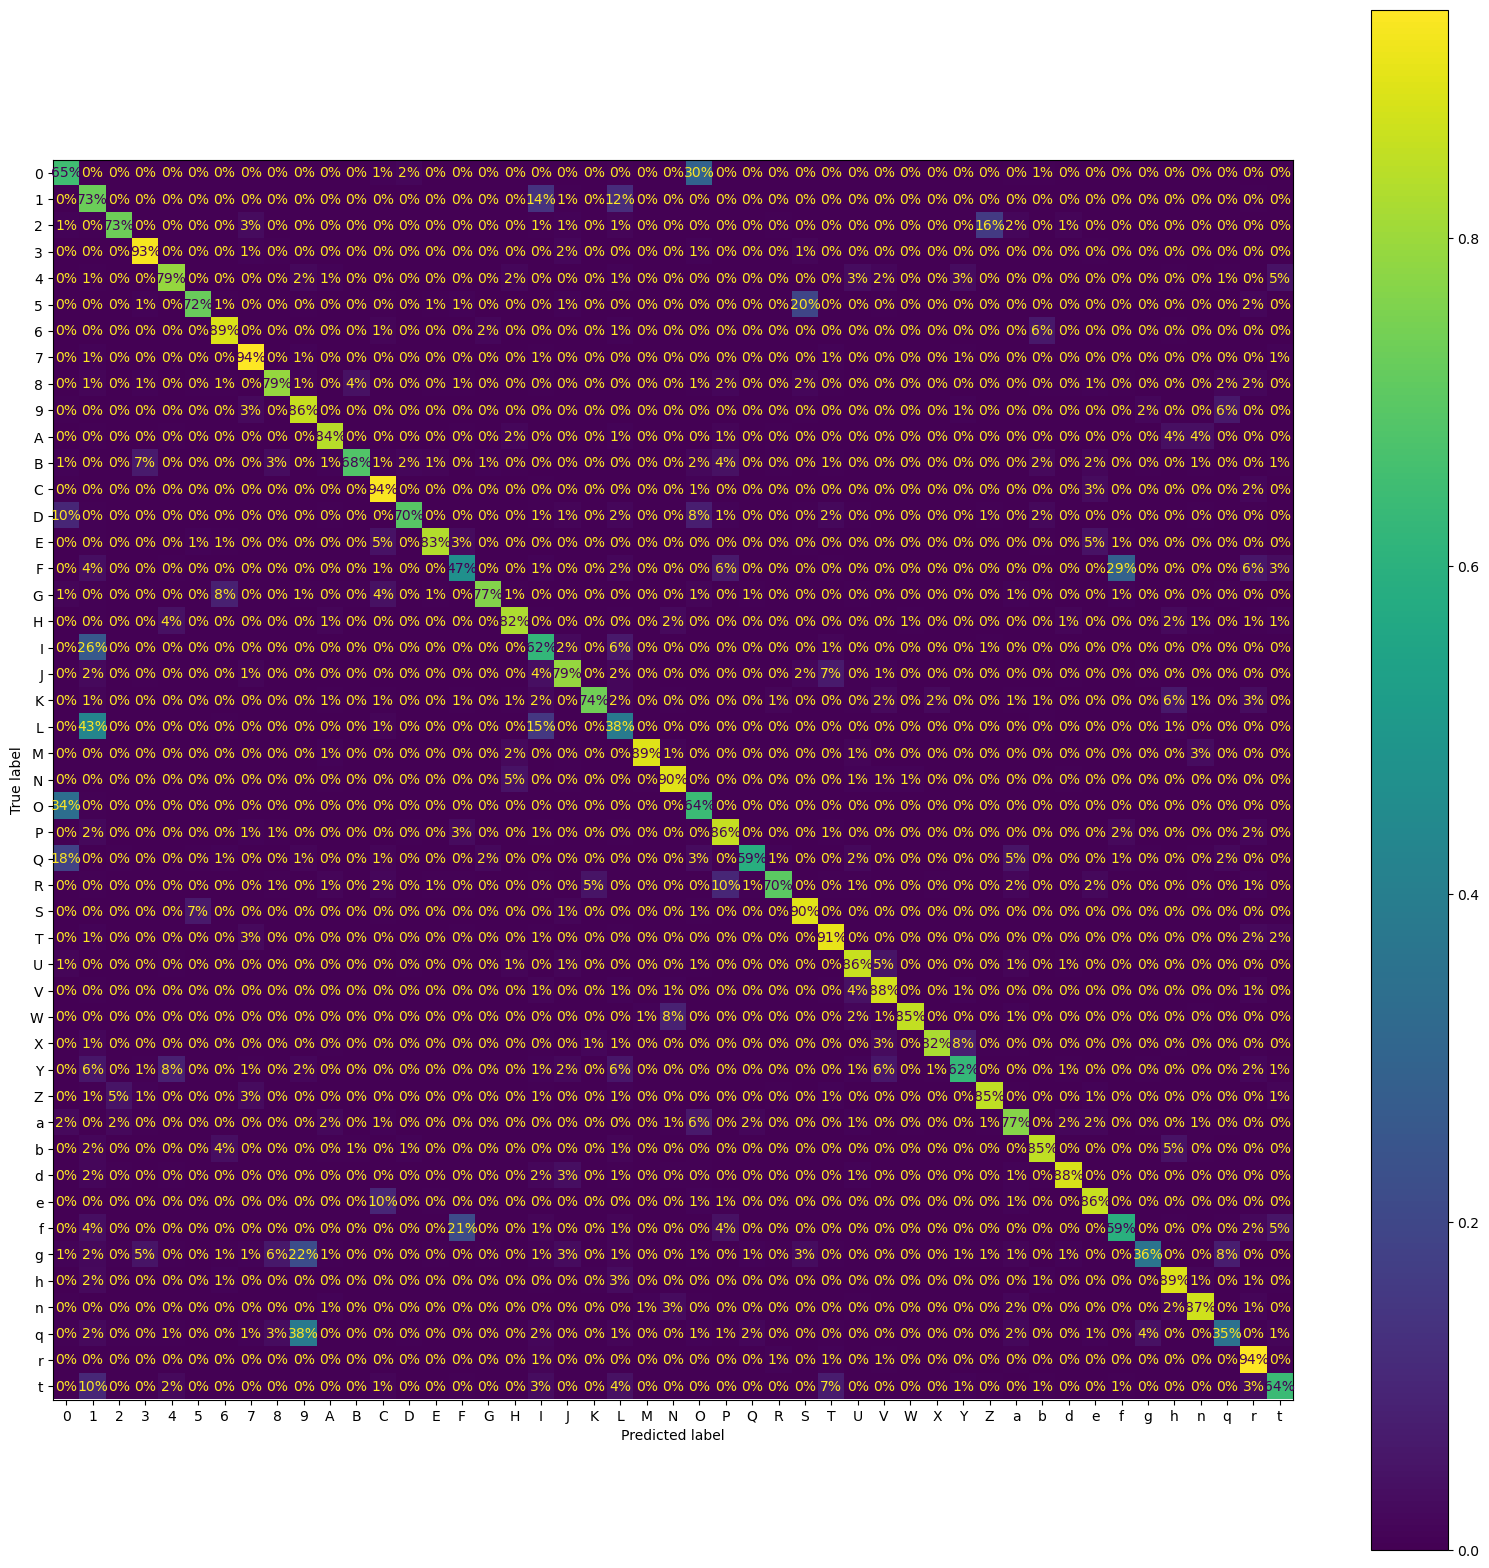

In [17]:
# import class that supports plotting confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
print("Confusion matrix of KNN model:")
fig, ax = plt.subplots(figsize=(20, 20))
plt.rc('font', size=10) # set font size
ConfusionMatrixDisplay.from_predictions(y_val, y_predicts, normalize="true", values_format=".0%", display_labels=dc.char_labels, ax=ax)


In confusion matrix, vertical axis represents actucal classes and horizontal axis represents predicted classes. Thus, the 84% in row 11 and column 11 mean that if actual class of an image is 'A', then the probability that model will predict this image belonging to class 'A' is 84%.

There are usually useful insights that can be drawn from the confusion matrix. For example, we can closely examine row 5 by tracing along the horizontal axis until we see a highlighted square with a value of 20%. This square corresponds to column 'S', which means that the model mistakenly predicted an image of '5' as 'S'. We will plot these characters to try to figure out the reason.

Images of '5':


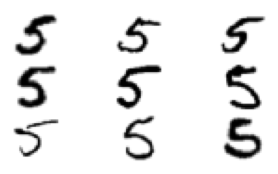

Images of 'S':


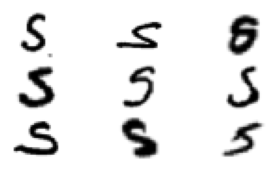

In [18]:
# plot images of '5'
print("Images of '5':")
utils.setup_figure(size=(4, 2))
dc.plot_character('5', 9)

# plot images of 'S'
print("Images of 'S':")
utils.setup_figure(size=(4, 2))
dc.plot_character('S', 9)

We can see that the images of '5' and 'S' are very similar. This is the reason why the model is confused between these two characters. We will try another more complex model to see if it can improve the accuracy.

## Random Forest Classifier

Random Forest Classifier is a type of ensemble learning method that combines multiple decision trees to improve the accuracy of predictions. It is widely used for classification tasks in machine learning due to its ability to handle large datasets and high-dimensional feature spaces.

**Initiating and training Random Forest model**

In [19]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# split training data into 2 set, one for training, other for validation
X_train, X_val, y_train, y_val = train_test_split(dc.X_train, dc.y_train, test_size=0.2)

# preprocess data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# initiate KNN classifier
rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=5)

# train KNN
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=5)

It takes a while to train Random Forest model. Now, we will evaluate its accuracy.

In [20]:
# predict images on validation set
y_predicts = rf_clf.predict(X_val)

In [21]:
# print result
print("Number of predictions:", len(y_predicts))
print("Number of correct predictions:", sum(y_predicts == y_val))
print("Accuracy rate: ", sum(y_predicts == y_val) / len(y_predicts))

Number of predictions: 22560
Number of correct predictions: 18159
Accuracy rate:  0.8049202127659575


Well, the model is about 6% more accuracy than previous KNN model. This is a huge improvement. But it's still not good enough. We will plot its confusion matrix too, before we conduct some methods to improve the accuracy.

**Confusion Matrix**

Confusion matrix of Random Forest model:


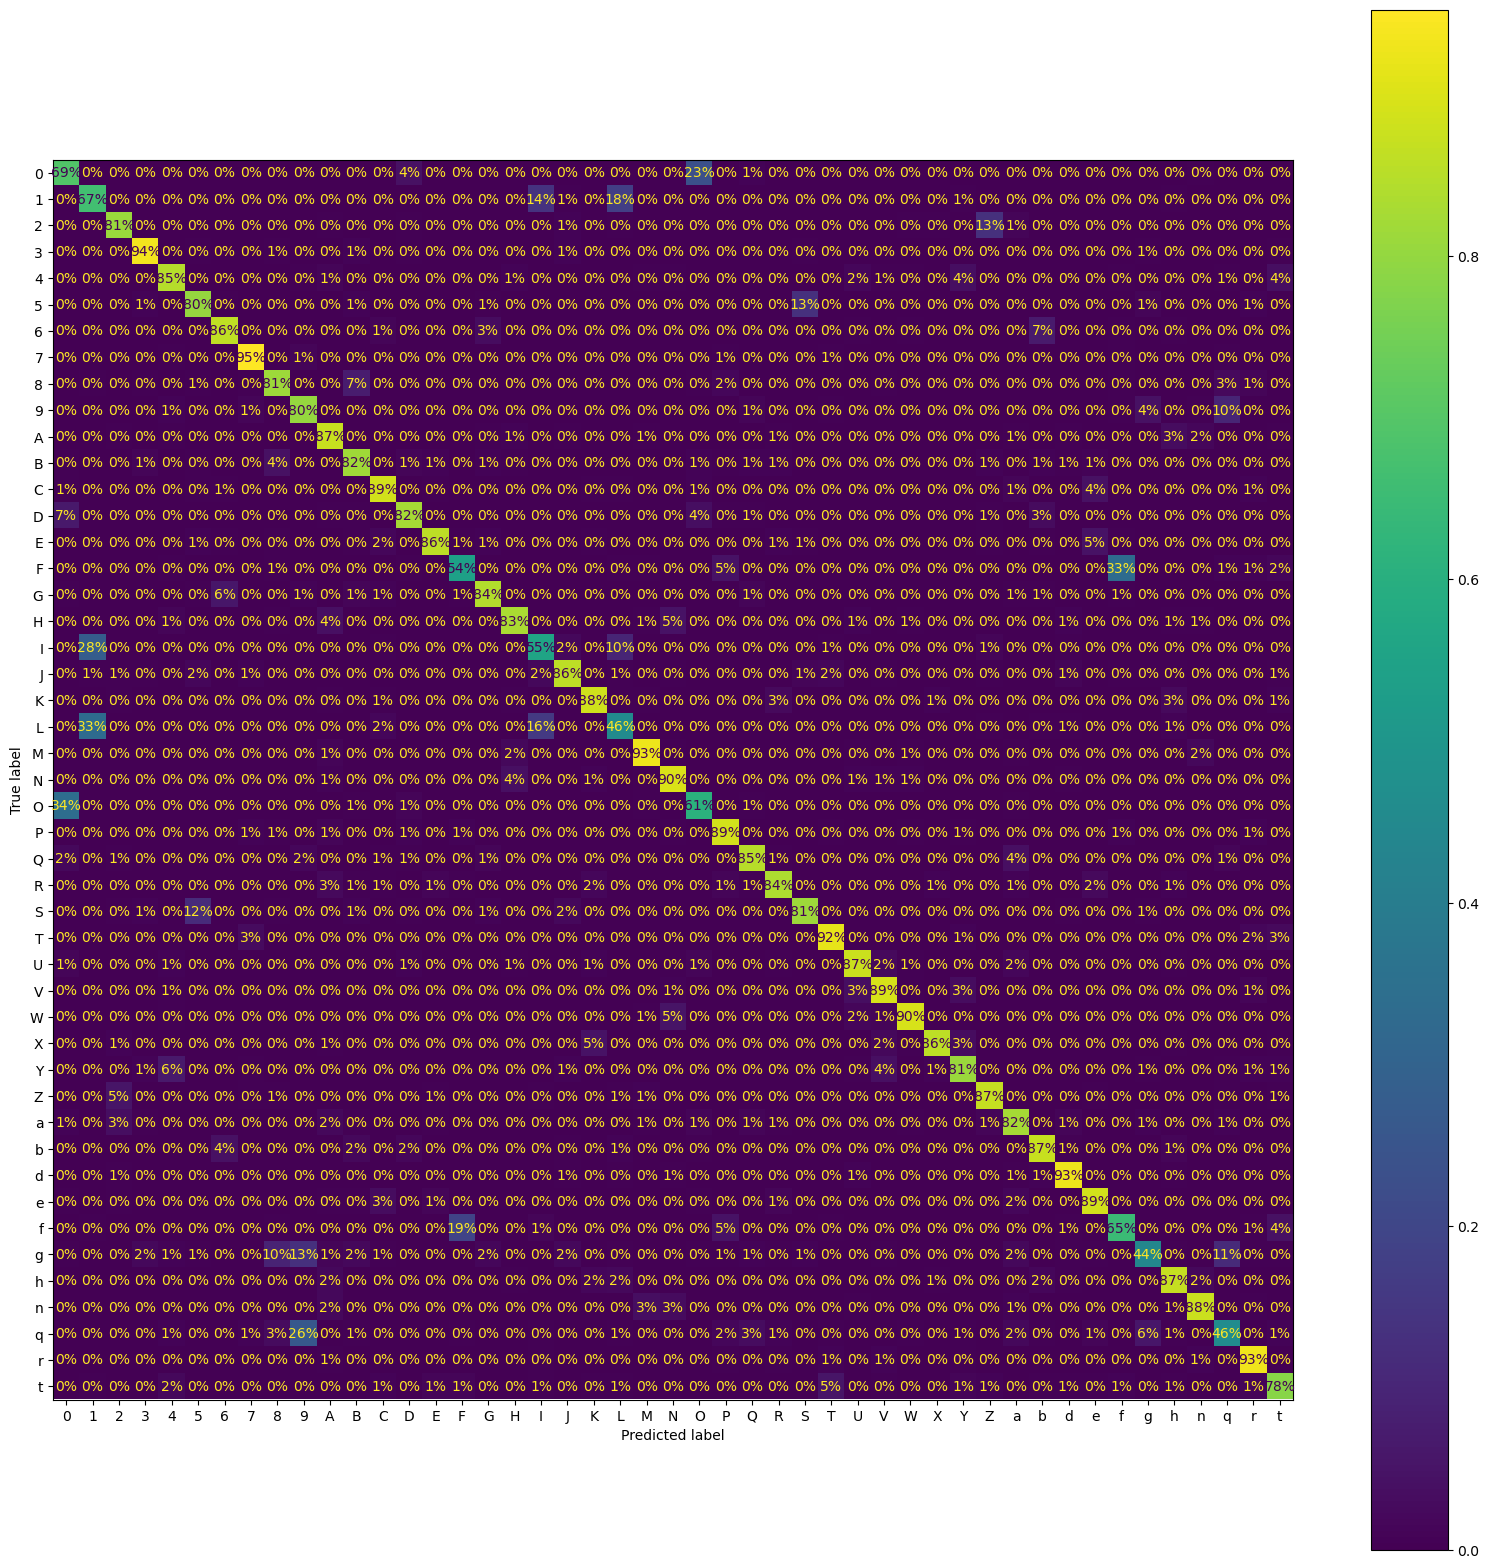

In [22]:
# Plot confusion matrix
print("Confusion matrix of Random Forest model:")
fig, ax = plt.subplots(figsize=(20, 20))
plt.rc('font', size=10) # set font size
ConfusionMatrixDisplay.from_predictions(y_val, y_predicts, normalize="true", values_format=".0%", display_labels=dc.char_labels, ax=ax)

# Fine tune model

Fine-tuning, also known as parameter tweaking, is the process of adjusting the hyperparameters of a machine learning model to improve its performance. This involves tweaking the values of the parameters used in the algorithm to optimize the model's accuracy and reduce the chance of overfitting.

The scikit-learn library provides classes and functions to help us to find the best hyper-parameters much more easily.

**Creating model pipline**

A model pipeline is a series of steps used to prepare data, train a machine learning model, and make predictions on new data. By creating a pipeline, we can automate the process of data preprocessing and model training, and easily apply the same pipeline to new datasets. This helps to improve efficiency and reduce errors in the modeling process.

In [23]:
# import pipeline class
from sklearn.pipeline import Pipeline

# instantiate processing steps
scaler = MinMaxScaler()
rf_clf = RandomForestClassifier(n_estimators=250, n_jobs=8)

# create pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('rf', rf_clf)
])

print(pipeline)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rf', RandomForestClassifier(n_estimators=250, n_jobs=8))])


**Tweaking hyper-parameters with GridSearchCV**

In [24]:
# import GridSearchCV class
from sklearn.model_selection import GridSearchCV

# Create param grid
# Program will try all combinations of parameters in the grid
# In this case, it will train 4 model corresponding to 4 different max_depth values,
# then it will validate the model with 3-fold cross validation and return estimated score to us
param_grid = {
    'rf__max_depth': [25],
    'rf__max_samples': [0.2, 0.7, 1.0]
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid,
                           cv=3, scoring='accuracy', return_train_score=True)

In [25]:
# run grid search
# for each combination of parameters, it will perform following steps:
# 1. split training data into 3 folds
# 2. train model with 2 folds
# 3. validate model with 1 fold
# 4. repeat step 2 and 3 for 3 times
# 5. return average score of 3 validation

grid_search.fit(dc.X_train, dc.y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('rf',
                                        RandomForestClassifier(n_estimators=250,
                                                               n_jobs=8))]),
             param_grid={'rf__max_depth': [25],
                         'rf__max_samples': [0.2, 0.7, 1.0]},
             return_train_score=True, scoring='accuracy')

In [26]:
# print best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'rf__max_depth': 25, 'rf__max_samples': 1.0}


In [27]:
# print best score
print("Best score:", grid_search.best_score_)

Best score: 0.8089716312056737


In [28]:
# import pandas library
import pandas as pd
# get result as a dataframs
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_rf__max_depth", "param_rf__max_samples", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score",
                 "split0_train_score", "split1_train_score", "split2_train_score", "mean_train_score"]]

# vector contain column names used to rename DataFrame columns
score_cols = ["test0_score", "test1_score", "test2_score", "mean_test",
              "train0_score", "train1_score", "train2_score", "mean_train"]

# rename columns
cv_res.columns = ["max_depth", "max_samples"] + score_cols

In [29]:
cv_res

,max_depth,max_samples,test0_score,test1_score,test2_score,mean_test,train0_score,train1_score,train2_score,mean_train
2,25,1.0,0.808271,0.809601,0.809043,0.808972,0.999428,0.999681,0.999508,0.999539
1,25,0.7,0.801410,0.804521,0.803750,0.803227,0.998710,0.998976,0.998657,0.998781
0,25,0.2,0.775319,0.774149,0.775745,0.775071,0.950053,0.950133,0.949348,0.949845


From table above, we see that the best model has max_depth = 25. It also shows that the model has been seriously suffered from overfitting. To tackle overfitting problems, we can increase the size of training set by using data augmentation.

# Building final pipeline

Now, we will build a final pipeline with the best insights found in previous step.

**Data augmentation**

We will use data augmentation to x4 the size of our training set. This will help to improve the accuracy of the model.

In [30]:
shifted_images, labels = utils.random_shift_images(dc.X_train, dc.y_train, min_dx=-7, max_dx=7, min_dy=-7, max_dy=7, iter_no=2)
dc.expand_training_set(shifted_images, labels)

In [31]:
print("Size of training set after data augmentation:", dc.X_train.shape)
print("Number of labels after data augmentation:", len(dc.y_train))

Size of training set after data augmentation: (338400, 784)
Number of labels after data augmentation: 338400


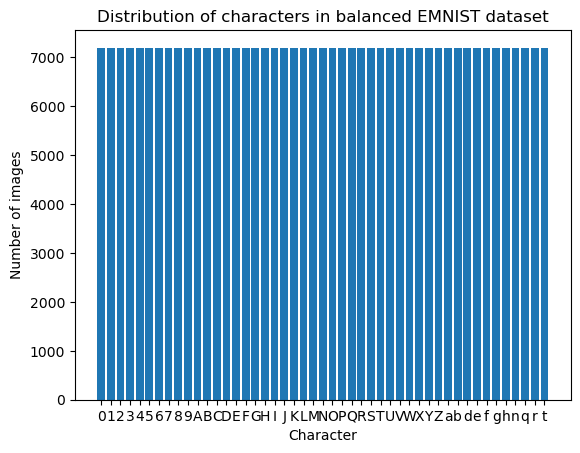

In [32]:
dc.plot_char_distribution()


**Build final pipeline**

This pipeline includes following layers:
1. MinMaxScaler: scale data to range [0, 1]
2. RandomForestClassifier: train Random Forest model

In [33]:
# import GPU support library
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# instantiate MinMaxScaler
scaler = MinMaxScaler(copy=False)

# instantiate RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=30, n_estimators=200, n_jobs=8)

# create pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('rf', rf_clf)
])

In [34]:
# traint the model
pipeline.fit(dc.X_train, dc.y_train)

Pipeline(steps=[('scaler', MinMaxScaler(copy=False)),
                ('rf',
                 RandomForestClassifier(max_depth=30, n_estimators=200,
                                        n_jobs=8))])

# Testing final model

At this point, we have the final model. We will test it with the test set.

In [35]:
# predict test set
y_predicts = pipeline.predict(dc.X_test)

In [36]:
print("Number of predictions:", len(y_predicts))
print("Number of correct predictions:", sum(y_predicts == dc.y_test))
print("Accuracy rate: ", sum(y_predicts == dc.y_test) / len(y_predicts))

Number of predictions: 18800
Number of correct predictions: 15496
Accuracy rate:  0.8242553191489361


Confusion matrix of final model:


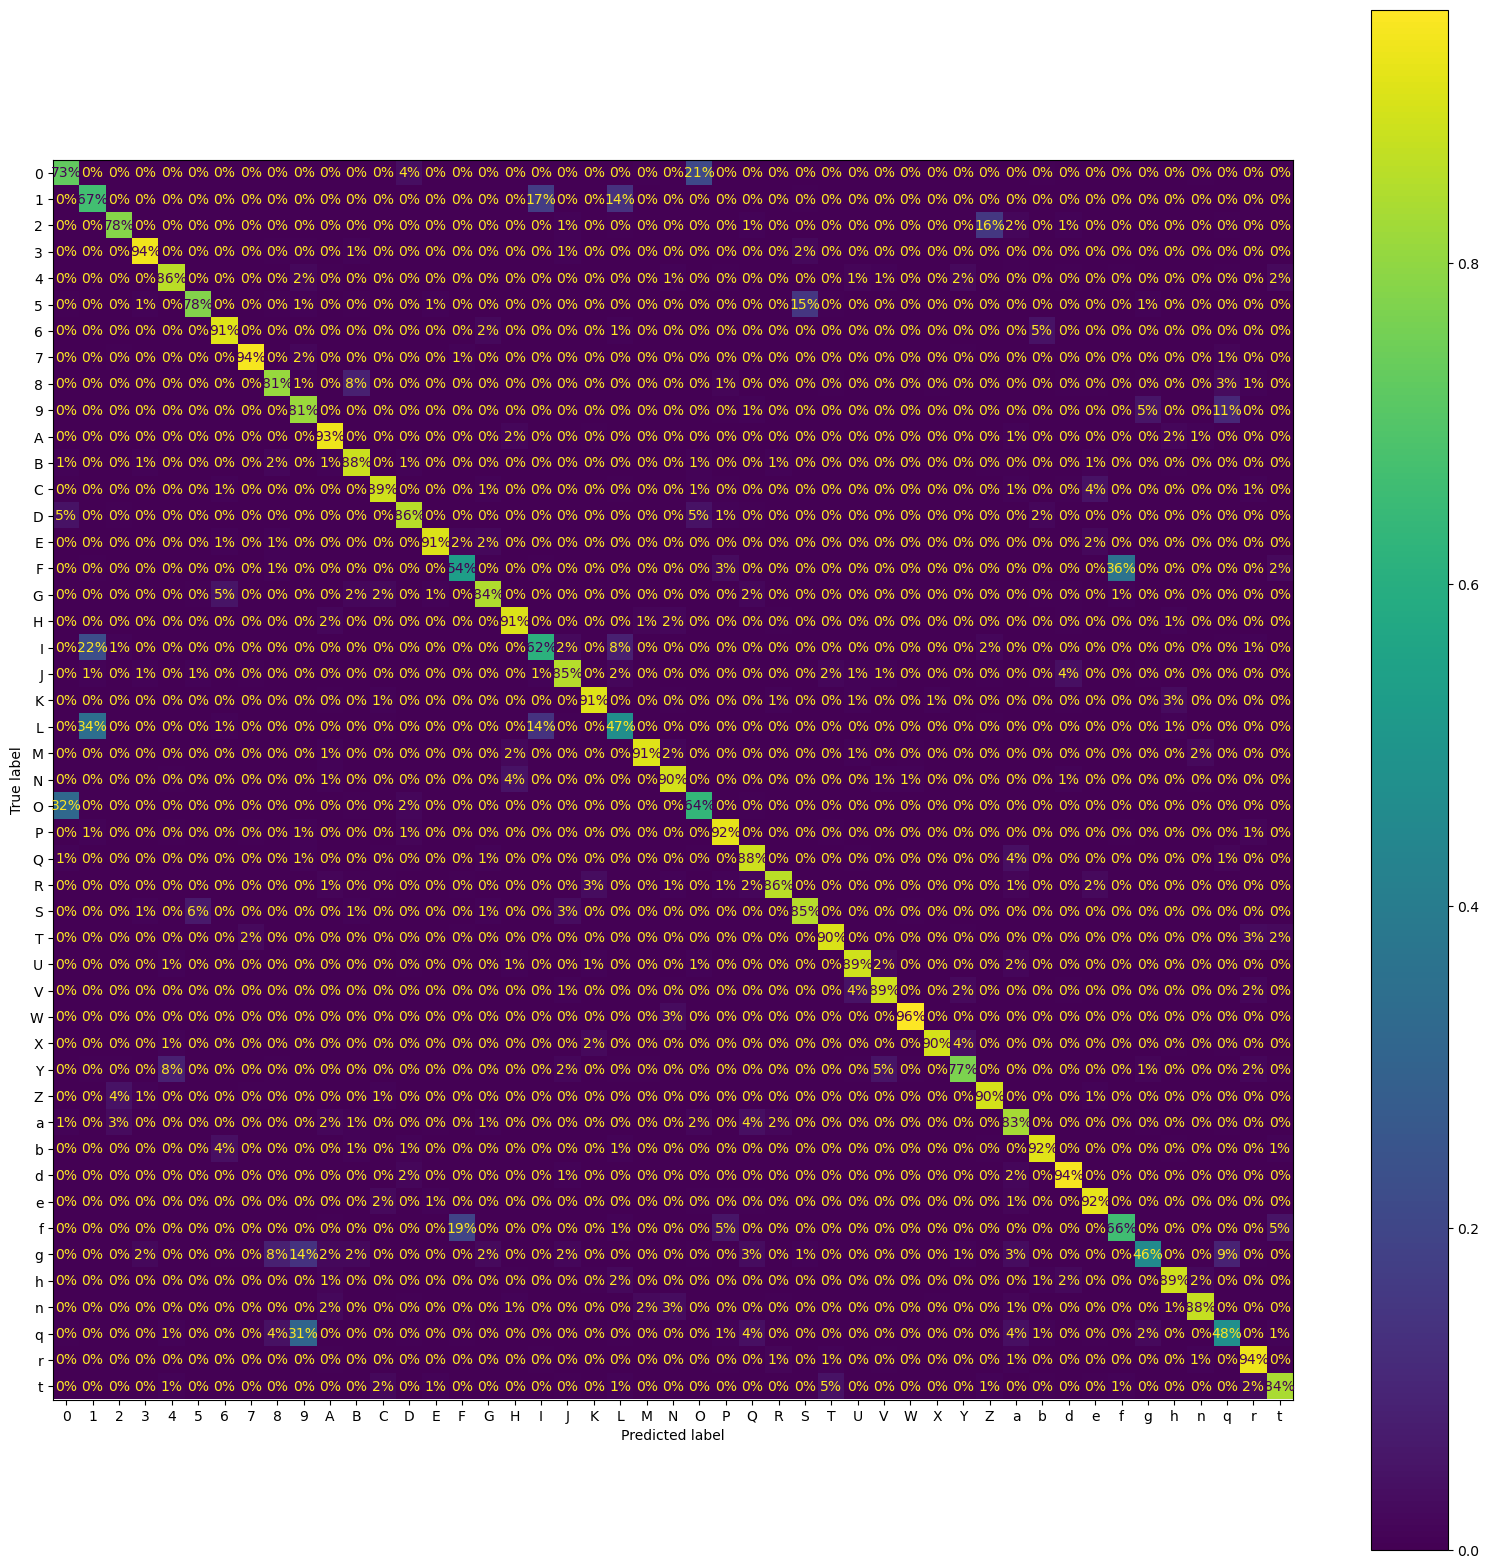

In [37]:
# import confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
print("Confusion matrix of final model:")
fig, ax = plt.subplots(figsize=(20, 20))
plt.rc('font', size=10) # set font size
ConfusionMatrixDisplay.from_predictions(dc.y_test, y_predicts, normalize="true", values_format=".0%", display_labels=dc.char_labels, ax=ax)

**Remark**

We have an accuracy of 82.4%, there is some improvement due to the positive effect of expanding the dataset. Nevertheless, 82.4% is still not the number that makes us truly satisfied. In real-world projects where accuracy is critical we need to perform some higher-level image processing or try more complex models such as ones in deep learning.

Now, we will review the accuracy of our models:
1. K-Nearest Neighbors: 76.4%
2. Random Forest: 80.5%
3. Random Forest -- with data augmentation: 82.5%

# Steps after training model

**Save model**

Model can be saved as binary file and then loaded later for any purpose.

In [38]:
# import helper library used to save model
import joblib

# import python Path class
from pathlib import Path

# we can easily save model with joblib
MODELS_PATH = Path().absolute().parent / "models"
joblib.dump(pipeline, MODELS_PATH / "emnist_classifier.pkl")

['/home/tringuyen/Docus/homl3/ch03/emnist_clf/models/emnist_classifier.pkl']

The classifier has been saved, it should be a very large file. We will check it.

In [39]:
# import os library
import os

# get size of file
file_stat = os.stat(MODELS_PATH / "emnist_classifier.pkl")
print(f"Size of model: {file_stat.st_size / 1024 / 1024 / 1024: .2f} GB")

Size of model:  14.23 GB


**Deploying ML model**

There are various ways to deploy a model, such as a web service, a mobile application, or a desktop application. For example, we can create a RESTfull web service that operates as follows:
1. Client sends a request to the server with an image of characters
2. Server process the image to make it a 28x28 grayscale image
3. The preprocessed image will be fetched into the model for predicting
4. The server will return the predicted character to client


# Conclusion and references

We have completed a full cycle of machine learning project. Despite its simplicity, the project represents many fundamental concepts that are valuable for starting steps in machine learning field.

**References**

1. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3nd Edition, Aurélien Géron

2. Cohen, G., Afshar, S., Tapson, J., & van Schaik, A. (2017). EMNIST: an extension of MNIST to handwritten letters. Retrieved from http://arxiv.org/abs/1702.05373